In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import graphviz
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df_feature = pd.read_csv("train_values.csv")
df_label = pd.read_csv("train_labels.csv")

In [4]:
df_feature

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:

df = pd.concat( [df_feature, df_label['damage_grade']], axis=1 )

In [6]:
# Check if the building_id is same in df_feature and df_lable
#from pandas.testing import assert_frame_equal
#assert_frame_equal(df_feature['building_id'],  df_label['building_id'])

In [7]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [8]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [9]:
df.land_surface_condition.replace({"n": 0, "o": 1,"t":2}, inplace=True)

In [10]:
df.foundation_type.replace({"h":0,"i":1,"r":2,"u":3,"w":4}, inplace=True)

In [11]:
df.roof_type.replace({"n":0,"q":1,"x":2}, inplace=True)

In [12]:
df.ground_floor_type.replace({"f":0,"m":1,"v":2,"x":3,"z":4}, inplace=True)

In [13]:
df.other_floor_type.replace({"j":0,"q":1,"s":2,"x":3}, inplace=True)

In [14]:
df.position.replace({"j":0,"o":1,"s":2,"t":3}, inplace=True)

In [15]:
df.plan_configuration.replace({"a":0,"c":1,"d":2,"f":3,"m":4,"n":5,"o":6,"q":7,"s":8,"u":9}, inplace=True)

In [16]:
df.legal_ownership_status.replace({"a":0,"r":1,"v":2,"w":3}, inplace=True)

In [17]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,2,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,2,2,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,2,2,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,2,2,...,0,0,0,0,0,0,0,0,0,2


In [18]:
df=df.drop(["building_id"], axis=1)

In [19]:
Y=df.pop("damage_grade")
X=df

In [20]:
feature = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "count_floors_pre_eq", "age", "area_percentage", "height_percentage", "land_surface_condition", "foundation_type", "roof_type"
, "ground_floor_type", "other_floor_type", "position", "plan_configuration", "has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered", "has_superstructure_other", "legal_ownership_status", "count_families", "has_secondary_use", "has_secondary_use_agriculture", "has_secondary_use_hotel", "has_secondary_use_rental", "has_secondary_use_institution", "has_secondary_use_school", "has_secondary_use_industry", "has_secondary_use_health_post", "has_secondary_use_gov_office", "has_secondary_use_use_police", "has_secondary_use_other"]
label = ["damage_grade"]

In [21]:
##The code below I refer from my data mining class PCA example code.

In [22]:
from sklearn.preprocessing import StandardScaler
cols = feature
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

In [23]:
X.cov()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
geo_level_1_id,1.000004,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,0.030434,0.197031,0.040651,...,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992
geo_level_2_id,-0.061405,1.000004,0.000921,0.047730,0.012594,-0.049443,0.035517,-0.034365,-0.034404,-0.090821,...,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068
geo_level_3_id,0.002718,0.000921,1.000004,-0.021646,-0.006385,-0.005643,-0.024507,-0.015610,0.007081,-0.007506,...,0.015995,-0.002001,-0.007356,-0.007058,-0.004374,-0.000862,-0.002632,-0.000943,0.000269,-0.002463
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000004,0.086668,0.101072,0.772737,0.043832,-0.149130,0.091733,...,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073
age,-0.003908,0.012594,-0.006385,0.086668,1.000004,-0.004323,0.061074,0.015866,-0.031302,-0.033532,...,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534
area_percentage,0.071158,-0.049443,-0.005643,0.101072,-0.004323,1.000004,0.196646,0.027887,-0.103045,0.259253,...,-0.016478,0.159886,0.105983,0.052213,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111
height_percentage,-0.063474,0.035517,-0.024507,0.772737,0.061074,0.196646,1.000004,0.022876,-0.149241,0.165649,...,-0.005390,0.123552,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397
land_surface_condition,0.030434,-0.034365,-0.015610,0.043832,0.015866,0.027887,0.022876,1.000004,-0.009165,0.054031,...,-0.006204,0.009847,0.008792,0.003889,0.004538,0.002525,0.001176,0.000719,0.002937,-0.011874
foundation_type,0.197031,-0.034404,0.007081,-0.149130,-0.031302,-0.103045,-0.149241,-0.009165,1.000004,-0.074318,...,0.006990,-0.069215,-0.049471,-0.021222,-0.006347,0.004415,-0.005235,-0.010164,-0.003342,-0.007687
roof_type,0.040651,-0.090821,-0.007506,0.091733,-0.033532,0.259253,0.165649,0.054031,-0.074318,1.000004,...,-0.056567,0.150329,0.129091,0.046603,0.021075,0.010723,0.010496,0.016702,0.008030,0.002448


In [24]:
eig_vals, eig_vecs = np.linalg.eig(X.cov())
eig_vals

array([3.07255501, 2.30205662, 1.97600832, 1.81273227, 0.00602697,
       0.20863883, 0.27984945, 1.45459209, 0.47836227, 0.53676163,
       0.56842167, 0.62525404, 0.68607098, 0.69191916, 0.72344475,
       1.19414078, 0.82181838, 0.85022758, 1.10962095, 0.88462092,
       1.07405106, 0.89537743, 0.91582643, 0.9301531 , 0.94202552,
       1.03688493, 0.95272989, 0.96312769, 1.0208957 , 0.98182331,
       1.0105403 , 0.99007966, 0.99341698, 1.00545876, 0.99820289,
       1.00344485, 1.00097726, 1.00200741])

In [25]:
eig_vecs

array([[-0.03888295,  0.2182665 , -0.16080528, ...,  0.04933733,
        -0.01799807, -0.04767328],
       [ 0.05982661, -0.12548354,  0.04439639, ..., -0.21651775,
        -0.05771937, -0.12205484],
       [ 0.02028625,  0.02345152,  0.02724843, ...,  0.40591698,
        -0.12799614,  0.09754601],
       ...,
       [-0.02149435,  0.00061413,  0.01831645, ...,  0.07963777,
        -0.22689544, -0.36435387],
       [-0.00856402,  0.00090821,  0.01352909, ...,  0.580667  ,
         0.37107296, -0.4406162 ],
       [-0.03239324,  0.00472225,  0.15103483, ...,  0.01144607,
         0.02205859,  0.1773867 ]])

In [26]:
eig_vecs.shape

(38, 38)

In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.0725550146913116
2.3020566180197597
1.9760083162308608
1.812732271078163
1.454592085584021
1.1941407848780727
1.1096209548970362
1.0740510600174074
1.0368849269168772
1.0208956983743438
1.0105402951985618
1.005458761171129
1.0034448484209126
1.0020074058683737
1.0009772586260255
0.9982028895358439
0.9934169839365381
0.9900796605350474
0.9818233057612586
0.9631276853180675
0.9527298850874764
0.942025518397654
0.9301530995911741
0.9158264280682403
0.8953774323615034
0.8846209199580013
0.850227576385151
0.8218183826856567
0.7234447483181096
0.6919191609721431
0.6860709829744394
0.6252540350275158
0.5684216691602456
0.5367616313449922
0.47836226820299677
0.27984945381914544
0.20863883132853664
0.00602696860201191


In [28]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [29]:
var_exp

[8.085640064278095,
 6.05802048519777,
 5.200001930858226,
 4.770329776605142,
 3.827859220793027,
 3.1424636911077983,
 2.9200439393855326,
 2.826439312049094,
 2.728634073934544,
 2.686557318178424,
 2.6593063617595796,
 2.645933955106568,
 2.6406342050479847,
 2.636851476004132,
 2.6341405726110247,
 2.6268396293369722,
 2.6142451892463727,
 2.6054627929431264,
 2.5837356269120417,
 2.5345368145362803,
 2.5071742873487,
 2.479005009416781,
 2.4477619219203617,
 2.410060299427127,
 2.3562473593267677,
 2.327940856359107,
 2.237432404791134,
 2.162671655619147,
 1.903794663829695,
 1.8208329102156413,
 1.805443027171997,
 1.645399041448225,
 1.4958407578025608,
 1.4125251885217645,
 1.2588432436610688,
 0.7364431051509605,
 0.5490474492687514,
 0.01586038282848112]

In [30]:
cum_var_exp

array([  8.08564006,  14.14366055,  19.34366248,  24.11399226,
        27.94185148,  31.08431517,  34.00435911,  36.83079842,
        39.55943249,  42.24598981,  44.90529617,  47.55123013,
        50.19186433,  52.82871581,  55.46285638,  58.08969601,
        60.7039412 ,  63.30940399,  65.89313962,  68.42767644,
        70.93485072,  73.41385573,  75.86161765,  78.27167795,
        80.62792531,  82.95586617,  85.19329857,  87.35597023,
        89.25976489,  91.0805978 ,  92.88604083,  94.53143987,
        96.02728063,  97.43980582,  98.69864906,  99.43509217,
        99.98413962, 100.        ])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

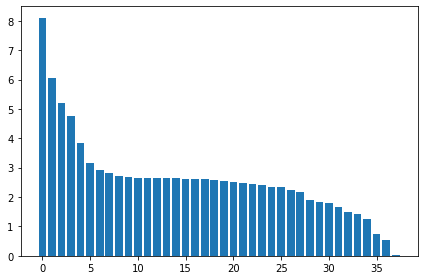

In [32]:
plt.bar(range(len(var_exp)), var_exp)
plt.tight_layout()

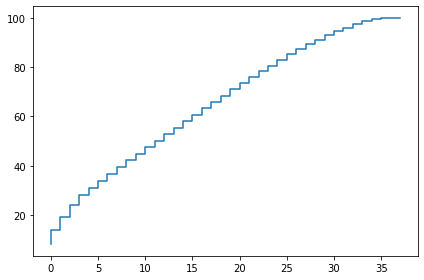

In [33]:
plt.step(range(len(var_exp)), cum_var_exp)
plt.tight_layout()

In [34]:
d = 38
k = 30
eig_pairs[0][1].reshape(d,1).shape

(38, 1)

In [35]:
matrix_w = eig_pairs[0][1].reshape(d, 1)
for i in range(1, k):
    matrix_w = np.concatenate((matrix_w, eig_pairs[i][1].reshape(d, 1)), axis=1)
matrix_w.shape

(38, 30)

In [36]:
X.dot(matrix_w)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.026966,-0.940944,-0.168123,-0.428718,1.307080,0.908837,-0.488594,-0.567886,0.004617,-0.516778,...,0.489644,0.138369,0.557630,-1.070470,-1.140369,0.894110,-1.035528,0.742288,0.110319,0.619707
1,-0.029532,-0.360298,0.437069,-1.047475,-0.145412,0.269104,0.629198,-0.303483,-0.490309,-0.133530,...,-0.367791,-0.452693,-0.382484,0.194104,0.029298,-0.085994,1.014127,0.691717,-0.182533,-1.620000
2,1.023139,-0.434456,0.192256,-0.432041,-0.932195,-0.773797,-0.393911,-0.937827,-0.351759,0.105766,...,0.766464,-0.467847,0.300107,-1.001768,-0.129990,-0.061241,-1.092403,0.369522,0.390189,0.000075
3,1.154824,0.328090,-1.502326,1.791912,-2.287198,-0.251233,-0.391999,0.589410,0.400922,0.229997,...,0.143996,0.709313,0.358571,0.466783,-0.554788,-0.704070,-0.621607,0.323558,-0.124462,-0.589927
4,-1.540587,-2.486389,-1.832579,0.398725,0.692629,0.029880,-0.636930,-0.463765,-0.846242,0.686940,...,0.777326,-1.397383,0.114298,-0.650210,-0.782413,0.783849,-0.978294,-0.039228,-0.217442,1.202808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1.694190,1.397410,0.310528,-0.738869,0.913982,0.875333,0.060866,-1.229137,-0.595850,-0.745881,...,-0.248823,-0.354864,-0.465931,1.094698,0.370648,-0.860827,-0.658694,-1.205700,1.001268,-0.344787
260597,1.060667,-0.283063,0.250494,-0.672303,0.254563,-0.430656,-0.209784,0.248916,-0.102228,0.461008,...,0.117430,-0.314508,-0.027757,0.186794,0.438492,-0.035478,-0.426726,-0.339443,0.106705,-0.052974
260598,-0.175520,-0.986238,-0.070413,-0.697474,-0.521525,-0.988374,-0.430618,0.197131,0.316944,0.399602,...,-0.134163,-0.401841,0.743573,-0.162683,-0.284335,-0.124419,0.010943,-0.402793,0.876878,0.309960
260599,-3.952744,1.951155,-1.381507,-1.336273,0.226559,-1.397913,-0.144175,0.067898,-0.031669,0.996968,...,-0.571976,-1.227323,-0.753915,0.912548,0.623331,-1.859728,1.389630,-0.842833,-0.693763,1.223257


In [37]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=k)
sklearn_pca.fit_transform(X)

array([[-1.02696553e+00, -9.40944142e-01, -1.68123025e-01, ...,
        -7.42287606e-01, -1.10318863e-01, -6.19707417e-01],
       [ 2.95316196e-02, -3.60298121e-01,  4.37069438e-01, ...,
        -6.91716899e-01,  1.82533154e-01,  1.61999961e+00],
       [-1.02313863e+00, -4.34456499e-01,  1.92256127e-01, ...,
        -3.69521984e-01, -3.90188636e-01, -7.45974112e-05],
       ...,
       [ 1.75520010e-01, -9.86238206e-01, -7.04132263e-02, ...,
         4.02793487e-01, -8.76878419e-01, -3.09960018e-01],
       [ 3.95274361e+00,  1.95115536e+00, -1.38150671e+00, ...,
         8.42832760e-01,  6.93763117e-01, -1.22325694e+00],
       [-4.43812551e-02, -1.45475035e+00, -9.02303554e-01, ...,
         7.53443644e-01, -1.10750161e+00, -4.54122975e-01]])